Written by [Gameli Ladzekpo](mailto:gameli.Ladzekpo@gmail.com) (Twitter/IG: @gamladz)

For [AI Core](theaicore.com)

In [57]:
import pandas as pd
import json
from ast import literal_eval
import numpy as np
import statsmodels.api as sm
import sklearn
from sklearn.linear_model import LinearRegression, Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt



In [58]:
X_train = pd.read_csv('X_train.csv') 
y_train = pd.read_csv('y_train.csv')

                            OLS Regression Results                            
Dep. Variable:             prod_price   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     12.05
Date:                Thu, 25 Feb 2021   Prob (F-statistic):           5.08e-21
Time:                        15:57:37   Log-Likelihood:                -2388.3
No. Observations:                 425   AIC:                             4803.
Df Residuals:                     412   BIC:                             4855.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           12.3608      5.239      2.359   

<AxesSubplot:>

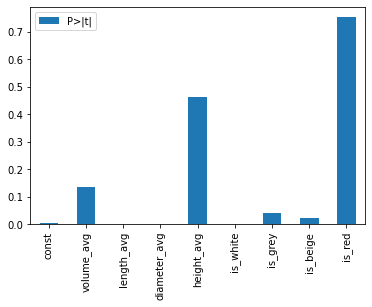

In [59]:
# - How important is each of your predictors
model = sm.OLS(y_train, X_train.astype(float)).fit()
predictions = model.predict(X_train) 

print_model = model.summary()
print(print_model)

# Recursive Feature elimination to make sure all P values are below 5% or 0.05. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct. Our null hypothesis is that non of these features have any bearing have on the outcome. In other words, Machine learning really starts with the assumption that we are wasting our time and the model has no predictive power and none of features are statistically signficant.
results_as_html = model_summary.tables[1].as_html()
summary_df = pd.read_html(results_as_html, header=0, index_col=0)[0]
summary_df.plot(kind='bar',y='P>|t|')



In [60]:
# Recursive Feature Illimination
for col in drop_cols:
    drop_cols =['is_plant','is_pink','is_black','is_blue','width_avg','depth_avg', 'in_outdoor','is_red', 'height_avg', 'volume_avg']
    X_train = X_train.drop(col, axis=1)
    model = sm.OLS(y_train, X_train.astype(float)).fit()
    predictions = model.predict(X_train) 

model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:             prod_price   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     35.84
Date:                Thu, 25 Feb 2021   Prob (F-statistic):           8.97e-26
Time:                        15:57:38   Log-Likelihood:                -2389.8
No. Observations:                 425   AIC:                             4790.
Df Residuals:                     420   BIC:                             4810.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.5689      4.090      2.828   

In [61]:

from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV

model = Ridge()

# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['lsqr']
space['alpha'] = loguniform(63.11903032841424,63.11903032841425 )
space['fit_intercept'] = [False]
space['normalize'] = [True]
search = RandomizedSearchCV(model, space, n_iter=1, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=1, return_train_score=True)
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)




Best Score: -31.575522944413933
Best Hyperparameters: {'alpha': 63.11903032841424, 'fit_intercept': False, 'normalize': True, 'solver': 'lsqr'}


In [62]:
print(X_train)



     const  length_avg  diameter_avg  is_white  is_grey  is_beige
0      1.0         0.0           0.0     False    False     False
1      1.0         0.0           0.0     False    False     False
2      1.0         0.0           0.0     False    False     False
3      1.0         0.0           0.0      True    False     False
4      1.0         0.0           0.0      True    False     False
..     ...         ...           ...       ...      ...       ...
420    1.0         0.0           0.0     False    False     False
421    1.0         0.0           0.0     False    False     False
422    1.0         0.0           0.0      True    False     False
423    1.0         0.0           0.0     False    False     False
424    1.0         0.0           0.0     False    False     False

[425 rows x 6 columns]


In [84]:
fields = ['volume_avg', 'length_avg', 'diameter_avg', 'height_avg', 'is_white', 'is_grey', 'is_beige']

answers = {}

# key = 'volume_avg'
# entry = input('What is the volume in cm?')
# entry = float(entry)
# answers[key] = entry
# print(answers)

key = 'length_avg'
entry = input('What is the length in cm?')
entry = float(entry)
answers[key] = entry
print(answers)

key = 'diameter_avg'
entry = input('What is the diameter in cm?')
entry = float(entry)
answers[key] = entry
print(answers)

# key = 'height_avg'
# entry = input('What is the height in cm?')
# entry = float(entry)
# answers[key] = entry
# print(answers)

key = 'const'
entry = 1
answers[key] = entry
print(answers)


key = 'is_white'
entry = input('is the colour white?')
if entry == 'Yes':
    entry = True
elif entry == 'yes':
    entry = True
else:
    entry = False
entry = bool(entry)
answers[key] = entry
print(answers)

key = 'is_grey'
entry = input('is the colour grey?')
if entry == 'Yes':
    entry = True
elif entry == 'yes':
    entry = True
else:
    entry = False
entry = bool(entry)
answers[key] = entry
print(answers)

key = 'is_beige'
entry = input('is the colour beige?')
if entry == 'Yes':
    entry = True
elif entry == 'yes':
    entry = True
else:
    entry = False
entry = bool(entry)
answers[key] = entry
print(answers)





{'length_avg': 8.0}
{'length_avg': 8.0, 'diameter_avg': 4.0}
{'length_avg': 8.0, 'diameter_avg': 4.0, 'const': 1}
{'length_avg': 8.0, 'diameter_avg': 4.0, 'const': 1, 'is_white': False}
{'length_avg': 8.0, 'diameter_avg': 4.0, 'const': 1, 'is_white': False, 'is_grey': False}
{'length_avg': 8.0, 'diameter_avg': 4.0, 'const': 1, 'is_white': False, 'is_grey': False, 'is_beige': False}


In [85]:
df = pd.DataFrame(data=answers, index = [0])
y_pred = search.predict(df)
print(f'the estimated price is £{y_pred}')
if answers['is_white'] == False:
    print('You can increase the value of your object by painting it white')

the estimated price is £[[154.20077577]]
You can increase the value of your object by painting it white


In [71]:
X_train

,const,length_avg,diameter_avg,is_white,is_grey,is_beige
0,1.0,0.0,0.0,False,False,False
1,1.0,0.0,0.0,False,False,False
2,1.0,0.0,0.0,False,False,False
3,1.0,0.0,0.0,True,False,False
4,1.0,0.0,0.0,True,False,False
...,...,...,...,...,...,...
420,1.0,0.0,0.0,False,False,False
421,1.0,0.0,0.0,False,False,False
422,1.0,0.0,0.0,True,False,False
423,1.0,0.0,0.0,False,False,False
